# Pyber Ride Sharing

    # Analysis
        Observed Trend-1
            Urban city tops in - total number of rides , total number of drivers , total fare
        Observed Trend-2
             Rural city tops in - average fare
        Observed Trend-3
            The minimum total rides per city in Urban cities is 15, which is greater than the maximum total rides per city in Rural cities

In [13]:
#Import required packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
from numpy.random import randn

In [14]:
#Assign the file paths to variables
city_data = os.path.join('raw_data','city_data.csv')
ride_data = os.path.join('raw_data','ride_data.csv')
#Open CSV files 
city_PD = pd.read_csv(city_data)
ride_PD = pd.read_csv(ride_data)

#Merging both ride data and city data into a single dataframe. 
city_ride_PD = pd.merge(city_PD,ride_PD,on='city')


#city_ride_PD['datetime'] = city_ride_PD['date']
#city_ride_PD['date'] = pd.to_datetime(city_ride_PD['date']).dt.date
city_ride_PD = city_ride_PD [["city","date","fare","ride_id","driver_count","type"]]
city_ride_PD.head(5)




,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [15]:
#create Dataframe for the required aggreage fields. 

city_group = city_ride_PD.groupby('city')
total_rides = city_group["ride_id"].count()
avg_fare =  city_group["fare"].mean()
total_drivers = city_group["driver_count"].min()
city_type = city_group["type"].min()

City_Summary_PD = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Average Fare" : avg_fare,
    "City_Type": city_type
})

City_Summary_PD.loc[City_Summary_PD.City_Type == 'Urban','Color'] = "yellow"
City_Summary_PD.loc[City_Summary_PD.City_Type == 'Suburban','Color'] = "lightblue"
City_Summary_PD.loc[City_Summary_PD.City_Type == 'Rural','Color'] = "orange"
City_Summary_PD.head(5)

,Average Fare,City_Type,Total Drivers,Total Rides,Color
city,,,,,
Alvarezhaven,23.928710,Urban,21,31,yellow
Alyssaberg,20.609615,Urban,67,26,yellow
Anitamouth,37.315556,Suburban,16,9,lightblue
Antoniomouth,23.625000,Urban,21,22,yellow
Aprilchester,21.981579,Urban,49,19,yellow


# Bubble Plot of Ride Sharing Data

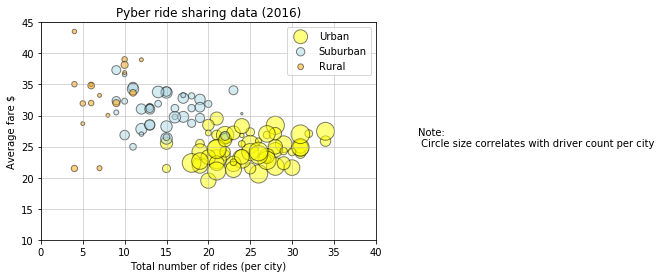

In [16]:
#Create datframes for each city type.

urban_Summary_PD = City_Summary_PD.loc[City_Summary_PD["City_Type"] == "Urban",:]
suburban_Summary_PD = City_Summary_PD.loc[City_Summary_PD["City_Type"] == "Suburban",:]
rural_Summary_PD = City_Summary_PD.loc[City_Summary_PD["City_Type"] == "Rural",:]

#create plots
urban_plot = plt.scatter(x=urban_Summary_PD['Total Rides'], y=urban_Summary_PD['Average Fare']
                              ,marker="o",c=urban_Summary_PD['Color'], edgecolors="black"
                              ,s=urban_Summary_PD['Total Drivers']*5,alpha=0.5,label=urban_Summary_PD['City_Type'])

suburban_plot = plt.scatter(x=suburban_Summary_PD['Total Rides'], y=suburban_Summary_PD['Average Fare']
                              ,marker="o",c=suburban_Summary_PD['Color'], edgecolors="black"
                              ,s=suburban_Summary_PD['Total Drivers']*5,alpha=0.5,label=suburban_Summary_PD['City_Type'])

rural_plot = plt.scatter(x=rural_Summary_PD['Total Rides'], y=rural_Summary_PD['Average Fare']
                              ,marker="o",c=rural_Summary_PD['Color'], edgecolors="black"
                              ,s=rural_Summary_PD['Total Drivers']*5,alpha=0.5,label=rural_Summary_PD['City_Type'])

#set plot features
plt.axis([0, 40, 10, 45])
plt.grid(linestyle='-', linewidth=0.5)
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average fare $")
plt.title("Pyber ride sharing data (2016)")
plt.text(45, 25, 'Note: \n Circle size correlates with driver count per city')
plt.legend((urban_plot, suburban_plot, rural_plot),('Urban', 'Suburban','Rural'))

plt.show()





# Total Fares by City Type

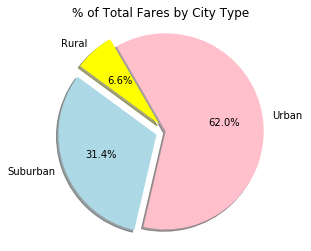

In [17]:
#create the percentage total fares by city type
cityType_total_fare_percent = (city_ride_PD.groupby('type')['fare'].sum()/sum(city_ride_PD['fare']))*100

#create Pie chart 
cityType_total_fare_percent.plot.pie(figsize=(5, 4),shadow=True,startangle=120 
                                     , title = '% of Total Fares by City Type' ,autopct="%1.1f%%"
                                    ,explode=[0.1,0.1,0],colors=['yellow','lightblue','pink'])
#set plot features 
plt.axis("equal")
plt.ylabel(" ")
plt.show()

# Total Rides by City Type

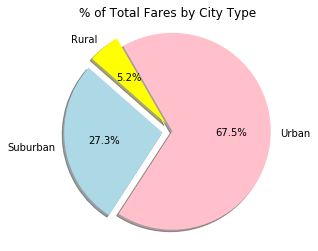

In [18]:
#create the percentage total rides by city type
cityType_total_ride_percent = (city_ride_PD.groupby('type')['ride_id'].count()/city_ride_PD['ride_id'].count())*100

#create Pie chart 
cityType_total_ride_percent.plot.pie(figsize=(5, 4),shadow=True,startangle=120 
                                     , title = '% of Total Fares by City Type' ,autopct="%1.1f%%"
                                    ,explode=[0.1,0.1,0],colors=['yellow','lightblue','pink'])
#set plot features
plt.axis("equal")
plt.ylabel(" ")
plt.show()

# Total Drivers by City Type

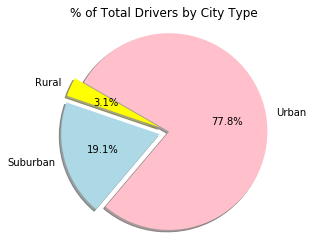

In [19]:
#create the percentage total drivers by city type
cityType_total_driver_percent = (city_PD.groupby('type')['driver_count'].sum()/sum(city_PD['driver_count']))*100

#create Pie chart 
cityType_total_driver_percent.plot.pie(figsize=(5, 4),shadow=True,startangle=150 
                                     , title = '% of Total Drivers by City Type' ,autopct="%1.1f%%"
                                    ,explode=[0.1,0.1,0],colors=['yellow','lightblue','pink'])
#set plot features
plt.axis("equal")
plt.ylabel(" ")
plt.show()

